Test TMS effect

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda-2.4.0/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cond']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
# variables
Results_DIR = '/home/despoB/kaihwang/TRSE/TTD/Results'
Subjects = ['7002', '7003', '7004', '7006', '7008']
Conditions = ['H2', 'F2', 'HF', 'FH']
ROIs=['S1', 'Ips']
Metrics=['MTD_FFA-VC','MTD_PPA-VC']



In [28]:
a=np.loadtxt('/home/despoB/kaihwang/TRSE/TTD/Results/sub-7008/ses-Ips/7008_Ips_H2_MTD_FFA-VC.1D')
len(a[a!=0])

#there are 446 timepoints 

446

In [40]:
# load MTD ts into df
MTD_df = pd.DataFrame()
for s in Subjects:
    for roi in ROIs:
        for i, cond in enumerate(Conditions):
            tmpdf = pd.DataFrame()
            for m in Metrics:
                fn ='/home/despoB/kaihwang/TRSE/TTD/Results/sub-%s/ses-%s/%s_%s_%s_%s.1D' %(s, roi, s, roi,cond,m)
                a=np.loadtxt(fn)
        
                tmpdf[m] = a[a!=0]
                tmpdf['ROI'] = roi
                tmpdf['Subj'] = int(s)
                tmpdf['Condition'] = cond
                tmpdf['Volume'] = np.arange(1,447)
                
            MTD_df = MTD_df.append(tmpdf,ignore_index=True)



In [42]:
MTD_df.head()

,MTD_FFA-VC,ROI,Subj,Condition,Volume,MTD_PPA-VC
0,0.598115,S1,7002,H2,1,0.194092
1,0.603328,S1,7002,H2,2,0.195824
2,0.866429,S1,7002,H2,3,0.536456
3,0.992457,S1,7002,H2,4,0.509978
4,0.843046,S1,7002,H2,5,0.375645


In [43]:
MTD_df.groupby(['Subj','ROI','Condition']).mean()

MTD_FFA-VC  Volume  MTD_PPA-VC
Subj ROI Condition                                
7002 Ips F2           0.538813   223.5    0.263396
         FH           0.512365   223.5    0.227969
         H2           0.551387   223.5    0.394736
         HF           0.583947   223.5    0.323623
     S1  F2           0.595917   223.5    0.346932
         FH           0.586714   223.5    0.265731
         H2           0.602825   223.5    0.330318
         HF           0.640352   223.5    0.385914
7003 Ips F2           0.359826   223.5    0.589269
         FH           0.372255   223.5    0.458378
         H2           0.355444   223.5    0.582679
         HF           0.338368   223.5    0.574718
     S1  F2           0.216424   223.5    0.573442
         FH           0.526068   223.5    0.688229
         H2           0.475026   223.5    0.551463
         HF           0.380532   223.5    0.555889
7004 Ips F2           0.352868   223.5    0.210950
         FH           0.267394   223.5    0.131085
         H2           0.247335   223.5    0.116000
         HF           0.158578   223.5    0.022086
     S1  F2           0.374983   223.5    0.198443
         FH           0.395716   223.5    0.171370
         H2           0.323285   223.5    0.247954
         HF           0.264192   223.5    0.144119
7006 Ips F2           0.281462   223.5    0.099655
         FH           0.261586   223.5    0.067123
         H2           0.130037   223.5    0.079681
         HF           0.132376   223.5    0.024247
     S1  F2           0.216666   223.5    0.091718
         FH           0.313461   223.5    0.161144
         H2           0.466384   223.5    0.162190
         HF           0.406311   223.5    0.263038
7008 Ips F2           0.394327   223.5    0.273956
         FH           0.345921   223.5    0.148968
         H2           0.334907   223.5    0.211203
         HF           0.496411   223.5    0.226223
     S1  F2           0.498588   223.5    0.284640
         FH           0.441547   223.5    0.246644
         H2           0.461937   223.5    0.345274
         HF           0.370979   223.5    0.263026

In [44]:
MTD_df.groupby(['Subj','ROI']).mean()

MTD_FFA-VC  Volume  MTD_PPA-VC
Subj ROI                                
7002 Ips    0.546628   223.5    0.302431
     S1     0.606452   223.5    0.332224
7003 Ips    0.356473   223.5    0.551261
     S1     0.399512   223.5    0.592256
7004 Ips    0.256544   223.5    0.120030
     S1     0.339544   223.5    0.190471
7006 Ips    0.201365   223.5    0.067676
     S1     0.350705   223.5    0.169522
7008 Ips    0.392892   223.5    0.215087
     S1     0.443263   223.5    0.284896

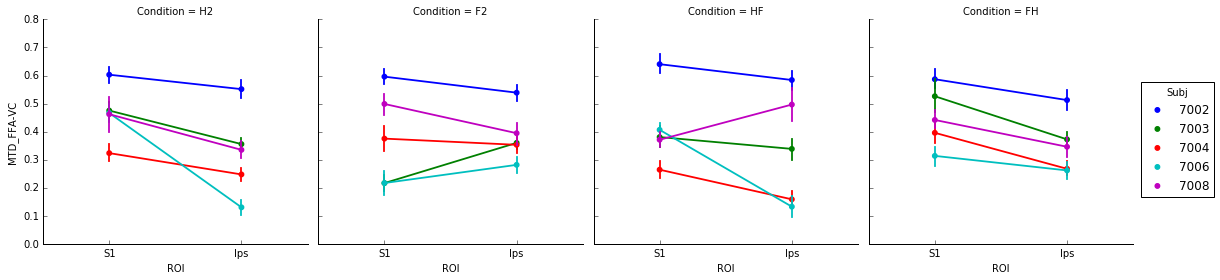

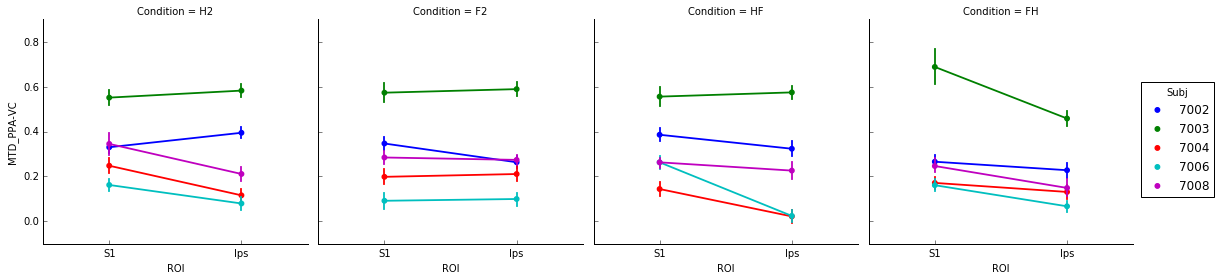

In [65]:
import seaborn as sns

sns.factorplot?
sns.factorplot(x='ROI',y='MTD_FFA-VC',hue='Subj',data=MTD_df,col='Condition')
sns.factorplot(x='ROI',y='MTD_PPA-VC',hue='Subj',data=MTD_df,col='Condition')

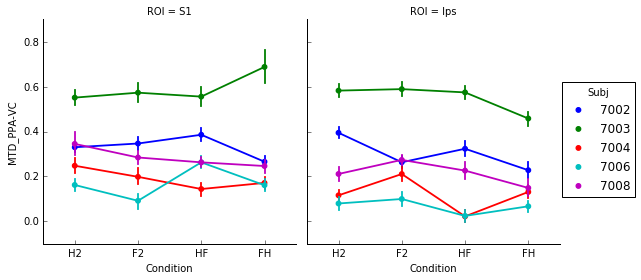

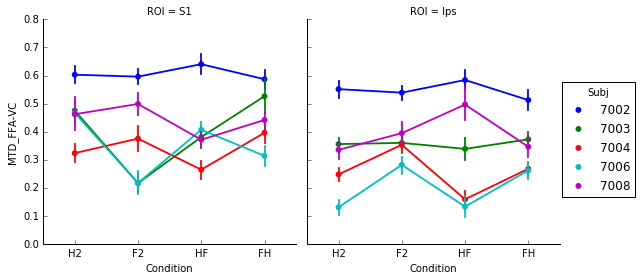

In [67]:
sns.factorplot(x='Condition',y='MTD_PPA-VC',hue='Subj',data=MTD_df,col='ROI')
sns.factorplot(x='Condition',y='MTD_FFA-VC',hue='Subj',data=MTD_df,col='ROI')